# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.143774e+01     6.263502e+00
 * time: 0.00493311882019043
     1     2.783582e+01     5.037005e+00
 * time: 0.014739990234375
     2     1.986139e+01     4.872229e+00
 * time: 0.038851022720336914
     3     1.298823e+01     1.167890e+00
 * time: 0.06724715232849121
     4     1.218230e+01     2.116230e+00
 * time: 0.08446002006530762
     5     1.149149e+01     1.321138e+00
 * time: 0.10157299041748047
     6     1.083844e+01     1.679364e+00
 * time: 0.11896395683288574
     7     1.050453e+01     1.080079e+00
 * time: 0.13623404502868652
     8     9.935342e+00     7.694493e-01
 * time: 0.15337514877319336
     9     9.575864e+00     5.447679e-01
 * time: 0.17115497589111328
    10     9.380753e+00     5.422471e-01
 * time: 0.18909907341003418
    11     9.298230e+00     3.300601e-01
 * time: 0.20752310752868652
    12     9.247988e+00     2.137219e-01
 * time: 0.2818131446838379
    13     9.218515e+00     3.201794e-01
 * time: 0

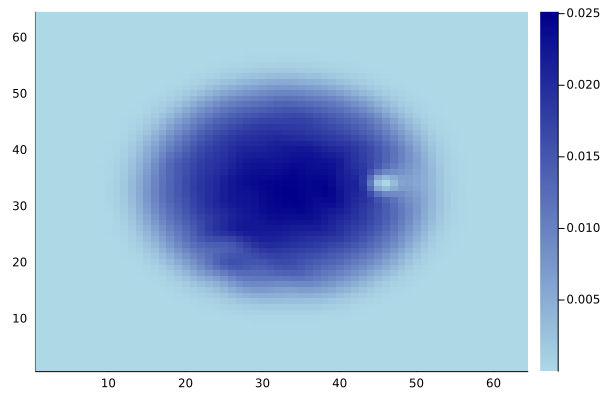

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)